In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape


((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    
    assumes w,y row arrays
    """
    # convert row arrays to matrices in correct shape
    w = np.matrix(w).T
    y = np.matrix(y).T
    
    # calculate e
    e =  y- np.dot(tx,w)
    
    #calculate loss
    loss =  np.dot(e.T,e)[0,0]/ 2 / y.shape[0] # MSE
    
    return loss
    
compute_loss(y,tx,[1,2])

2694.483365887085

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search.
    w0 and w1 are arrays 
    """
    losses = np.zeros((len(w0), len(w1)))
    for i0 in w0:
        for i1 in w1:
            losses[w0.tolist().index(i0),w1.tolist().index(i1)] = compute_loss(y,tx,[i0,i1])
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609525, w0*=72.72727272727272, w1*=13.636363636363626, execution time=7.967 seconds


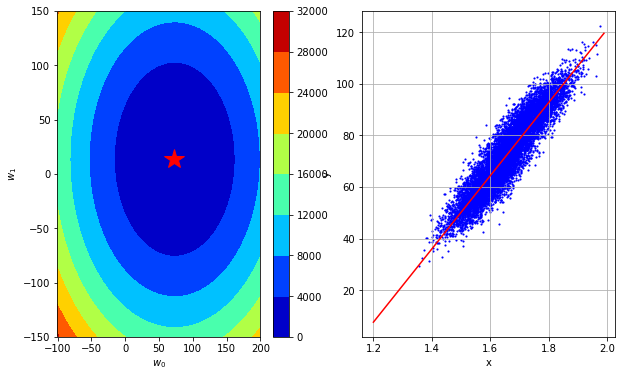

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)
# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [34]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # asuming y,w are row vectors again
    # convert row arrays to matrices in correct shape
    w = np.matrix(w).T
    y = np.matrix(y).T
    
    # calculate e
    e =  y- np.dot(tx,w)
    # calculate gradient
    gradient = np.dot(tx.T,e)
    gradient *= -1/ y.shape[0]
    return np.array(gradient).flatten()

In [35]:
print(compute_gradient(y,tx,[100,20]))
print(compute_gradient(y,tx,[50,10]))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [38]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma*gradient
        print(w)

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [77]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[51.3057454 12.4357987]
Gradient Descent(0/49): loss=2707.439588409277, w0=51.305745401473644, w1=12.435798704492274
[66.69746902 13.16653832]
Gradient Descent(1/49): loss=257.67072091746957, w0=66.69746902191572, w1=13.166538315839997
[71.31498611 13.3857602 ]
Gradient Descent(2/49): loss=37.19152284320703, w0=71.31498610804834, w1=13.385760199244327
[72.70024123 13.45152676]
Gradient Descent(3/49): loss=17.348395016523398, w0=72.70024123388814, w1=13.45152676426563
[73.11581777 13.47125673]
Gradient Descent(4/49): loss=15.56251351212186, w0=73.11581777164007, w1=13.471256733772023
[73.24049073 13.47717572]
Gradient Descent(5/49): loss=15.401784176725725, w0=73.24049073296565, w1=13.47717572462394
[73.27789262 13.47895142]
Gradient Descent(6/49): loss=15.387318536540068, w0=73.27789262136334, w1=13.478951421879517
[73.28911319 13.47948413]
Gradient Descent(7/49): loss=15.386016628923361, w0=73.28911318788263, w1=13.47948413105619
[73.29247936 13.47964394]
Gradient Descent(8/49): loss=

In [63]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [78]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm.
    assumes y,w are arrays
    """
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        # create batch of random datapoints
        
        batch_indices = np.random.randint(tx.shape[0],size = batch_size)
        batch_y = y[batch_indices]
        batch_tx = tx[batch_indices,:]
        # calculate loss & gradient
        loss = compute_loss(y,tx,w)
        gradient = compute_gradient(batch_y,batch_tx,w)

        # update w by gradient
        w = w - gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [80]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.236712759168, w0=55.983593167398055, w1=47.82639337110083
Stochastic Gradient Descent(1/49): loss=755.056875715209, w0=65.35875886933796, w1=20.044713865303287
Stochastic Gradient Descent(2/49): loss=68.41891673065759, w0=71.30987487442805, w1=17.4884900553499
Stochastic Gradient Descent(3/49): loss=25.38925837600437, w0=72.17975461377978, w1=13.079031138863114
Stochastic Gradient Descent(4/49): loss=16.086845103965913, w0=73.41460210331653, w1=13.240995052681974
Stochastic Gradient Descent(5/49): loss=15.421662706551363, w0=72.5083378581291, w1=11.090272438357555
Stochastic Gradient Descent(6/49): loss=18.54917084121388, w0=71.99422015663033, w1=13.56484087535322
Stochastic Gradient Descent(7/49): loss=16.23412373807419, w0=73.4097076506202, w1=13.24539037967313
Stochastic Gradient Descent(8/49): loss=15.42004443983416, w0=73.32038697565636, w1=14.169953453376904
Stochastic Gradient Descent(9/49): loss=15.624454397974489, w0=73.288933717925

In [81]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


In [88]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)



In [89]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

[51.8474641  10.72442641]
Gradient Descent(0/49): loss=2809.486165875961, w0=51.847464098448484, w1=10.724426406192425
[67.40170333 10.94175433]
Gradient Descent(1/49): loss=312.85071932220484, w0=67.401703327983, w1=10.941754328050115
[72.0679751 11.0069527]
Gradient Descent(2/49): loss=88.15352913236751, w0=72.06797509684336, w1=11.00695270460741
[73.46785663 11.02651222]
Gradient Descent(3/49): loss=67.93078201528215, w0=73.46785662750146, w1=11.026512217574595
[73.88782109 11.03238007]
Gradient Descent(4/49): loss=66.11073477474449, w0=73.88782108669889, w1=11.03238007146475
[74.01381042 11.03414043]
Gradient Descent(5/49): loss=65.94693052309607, w0=74.01381042445813, w1=11.034140427631797
[74.05160723 11.03466853]
Gradient Descent(6/49): loss=65.93218814044772, w0=74.0516072257859, w1=11.03466853448191
[74.06294627 11.03482697]
Gradient Descent(7/49): loss=65.93086132600936, w0=74.06294626618423, w1=11.034826966536944
[74.06634798 11.0348745 ]
Gradient Descent(8/49): loss=65.9307

In [90]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

In [ ]:
# bias is pulled towards the outliers, to compensate for this the angle "overshoots" to go through the median of the point cloud

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [ ]:
# take L1 norm of error 
# gradient = - 1 / n * X.T . sign(y-X.T .w)